In [1]:
import imageio
import visvis as vv
import numpy as np
from PIL import Image

In [2]:
AH_img = imageio.imread("../Datasets/RosterImages/AHauck.jfif", as_gray='True')
AJ_img = imageio.imread("../Datasets/RosterImages/ajohnson.jfif", as_gray='True')
DH_img = imageio.imread("../Datasets/RosterImages/dherschel.jfif", as_gray='True')
AO_img = imageio.imread("../Datasets/RosterImages/aortiz.jfif", as_gray='True')
RS_img = imageio.imread("../Datasets/RosterImages/rshomer.jfif", as_gray='True')

print(np.shape(AH_img))
print(np.shape(AJ_img))
print(np.shape(DH_img))
print(np.shape(AO_img))
print(np.shape(RS_img))

(770, 575)
(640, 480)
(785, 587)
(640, 480)
(1175, 876)


In [3]:
import matplotlib.pyplot as plt
# plt.figure()
# plt.imshow(RS_img, cmap=plt.cm.gray)
# plt.show()

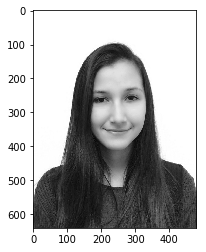

In [4]:
plt.figure()
plt.imshow(AO_img, cmap=plt.cm.gray)
plt.show()

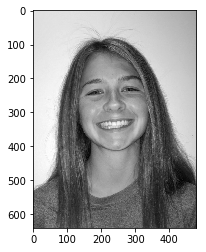

In [5]:
plt.figure()
plt.imshow(AJ_img, cmap=plt.cm.gray)
plt.show()

# Part 1: Linear Combinations
Load ALL of the images, and check their sizes (you can use the code above as a starter).
Store these images in a list of matrices (rather than individual names or an array).

Notice: You can store images that have different dimensions in a LIST of the matrices. However, if you store them as an array with each matrix as a new entry, only the matrices that are the same size will be able to be stored.

In [6]:
#Put your code here!
from pathlib import Path
import glob

imgs = {}

for img_uri in glob.glob("../Datasets/RosterImages/*.jfif"): 
    img = imageio.imread(img_uri, as_gray='True')
    size = np.shape(img)
    
    if size in imgs:
        imgs[size].append(img)
    else:
        imgs[size] = [img]

for k, v in imgs.items():
    print(k, len(v)) 
    # => shows (640, 480) to be the mode size (5)

(770, 575) 1
(640, 480) 5
(1028, 768) 1
(1407, 1050) 1
(1098, 818) 1
(1109, 830) 1
(908, 679) 1
(785, 586) 1
(785, 587) 1
(1396, 1042) 1
(657, 490) 1
(734, 548) 1
(769, 575) 1
(1175, 876) 1
(1303, 972) 1


Now, loop over your list and extract all the matrices that are the same size and store those in an array.
If you prefer, you can actually go back and modify you loop(s) above to do so, and re-execute the cell.

In [7]:
targets = imgs[(640, 480)]

#### Merging Images via Linear Combinations
Write a loop to make 10 images with progressive combinations of two different images that are the same size. The first image should be just one of the basic images, and the last should be the other image. These should all be stored in the same array, with the final index being which image in the sequence it is. (I.E., [x-indx, y-indx, img-indx] ). 

0.0 \% Target-1;  100.0 \% Target-2


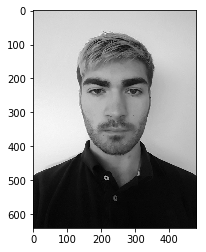

10.0 \% Target-1;  90.0 \% Target-2


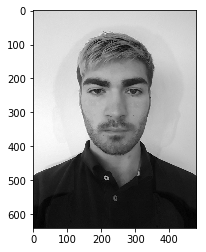

20.0 \% Target-1;  80.0 \% Target-2


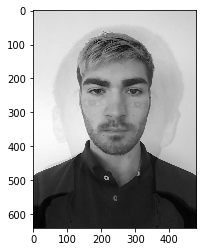

30.0 \% Target-1;  70.0 \% Target-2


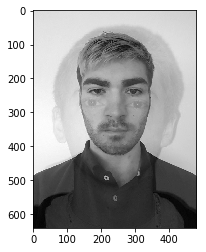

40.0 \% Target-1;  60.0 \% Target-2


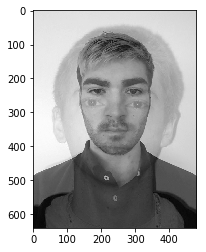

50.0 \% Target-1;  50.0 \% Target-2


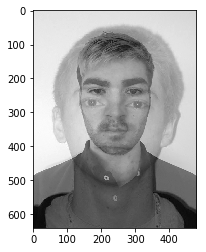

60.0 \% Target-1;  40.0 \% Target-2


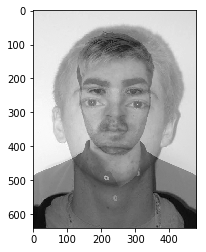

70.0 \% Target-1;  30.0 \% Target-2


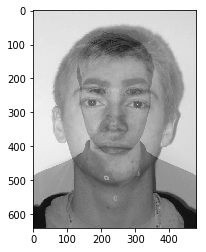

80.0 \% Target-1;  20.0 \% Target-2


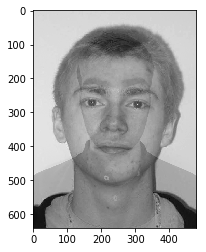

90.0 \% Target-1;  10.0 \% Target-2


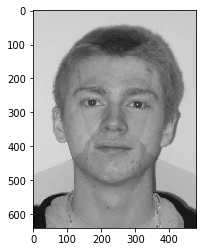

100.0 \% Target-1;  0.0 \% Target-2


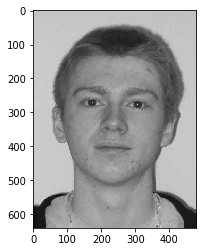

In [8]:
#Loop over to make the combinations of the images. 
target1 = targets[0]
target2 = targets[1]

for concentration in range(0, 11):
    c1 = concentration/10.0 
    c2 = (10.0 - concentration)/10.0
    
    print(c1 * 100, "\% Target-1; ", c2 * 100, "\% Target-2")
    plt.figure()
    plt.imshow(c1*target1+c2*target2, cmap=plt.cm.gray)
    plt.show()

#### Making an animation
Look at these two sites, and attempt to animate the transition between the two images.

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

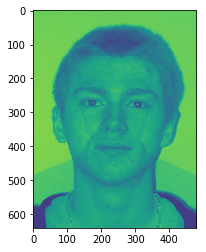

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

target1 = targets[0]
target2 = targets[1]
fig, ax = plt.subplots()

im = plt.imshow(target2, animated=True)
    
# animation function. This is called sequentially
def animate(concentration):
    c1 = concentration/10.0 
    c2 = (10.0 - concentration)/10.0
    
    im.set_array(c1*target1 + c2*target2)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=10, interval=200, blit=True)
HTML(anim.to_html5_video())

# Part 2: Edge detection in a Picture
Let's try to do the edge detection from the convolutions intro, but on some of the images.

#### Replicating code from the convolutions notebook.
Copy the code for the "Top" matrix, the "Straight" matrices, and the "diagonal" matrices.

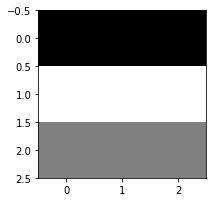

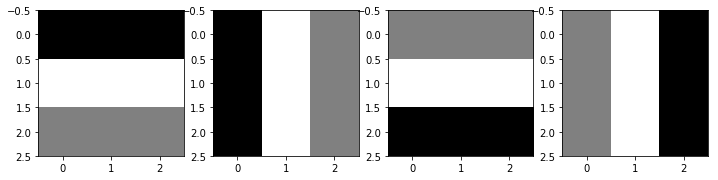

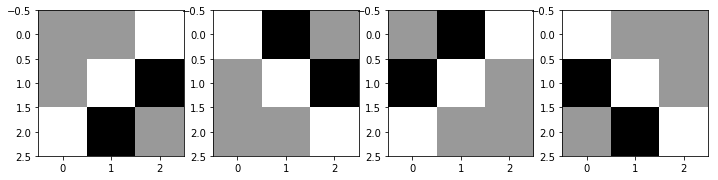

In [43]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
# from scipy.ndimage import imread
# from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

# Put all that code here.
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]
plot(top)


straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

#### Edge detection with convolutions
Use the convolutions example to apply the straight and diagonal matrices through convolutions to at least two images. I'd recommend using Ari's image and another one.

In [ ]:
# 